Import libraries

In [7]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

Load the dataset

In [8]:
dataset = pd.read_csv('Iris.csv')

# Splitting the dataset X and Y
features = dataset.iloc[:, 2:-1].values  # All rows and all columns except the last one (features)
labels = dataset.iloc[:, 1].values  # All rows, only the Species column

# Convert categorical features to numerical (if necessary)
le = LabelEncoder()
for i in range(features.shape[1]):
    if isinstance(features[0, i], str):  # Check if the feature is categorical
        features[:, i] = le.fit_transform(features[:, i])

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0)

# Displaying the shapes of the training and test sets
print("Training features shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training features shape: (105, 3)
Training labels shape: (105,)
Test features shape: (45, 3)
Test labels shape: (45,)


In [9]:
# Euclidean distance function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# K-N-N prediction function
def knn_classifier(train_features, train_labels, test_features, k_value):
    predictions = []
    for test_point in test_features:
        distances = []
        for i in range(len(train_features)):
            dist = euclidean_distance(test_point, train_features[i])
            distances.append((dist, train_labels[i]))
        distances.sort(key=lambda x: x[0])
        k_nearest_neighbors = [distances[i][1] for i in range(k_value)]
        most_common = Counter(k_nearest_neighbors).most_common(1)[0][0]
        predictions.append(most_common)
    return predictions

# Function to calculate accuracy
def calc_accuracy(actual_labels, predicted_labels):
    return np.sum(np.array(predicted_labels) == actual_labels) / len(actual_labels)

# Confusion matrix function
def create_confusion_matrix(actual_labels, predicted_labels):
    unique_classes = np.unique(actual_labels)
    confusion_mtx = np.zeros((len(unique_classes), len(unique_classes)), dtype=int)
    class_to_index = {label: idx for idx, label in enumerate(unique_classes)}

    for true_label, pred_label in zip(actual_labels, predicted_labels):
        confusion_mtx[class_to_index[true_label], class_to_index[pred_label]] += 1

    return confusion_mtx


In [10]:
# Predicting the labels for the entire test set
k_value = int(input("Enter k: "))
predicted_labels = knn_classifier(X_train, y_train, X_test, k_value)

# Comparing predictions with the actual test labels
print("\nPredicted labels for the test set:", predicted_labels)
print("Actual labels for the test set:   ", list(y_test))

Enter k: 20

Predicted labels for the test set: [6.5, 5.7, 5.1, 6.7, 5.1, 6.7, 5.1, 6.3, 6.3, 5.7, 6.3, 5.7, 6.3, 5.7, 6.3, 4.9, 5.7, 5.7, 4.9, 5.1, 6.3, 5.7, 5.1, 4.9, 6.3, 5.1, 5.1, 5.7, 5.7, 5.1, 6.5, 5.7, 5.1, 6.3, 6.7, 5.7, 5.1, 6.3, 5.7, 5.7, 6.5, 4.6, 6.7, 5.1, 5.1]
Actual labels for the test set:    [5.8, 6.0, 5.5, 7.3, 5.0, 6.3, 5.0, 6.7, 6.8, 6.1, 6.1, 6.4, 6.1, 6.5, 6.1, 4.9, 6.0, 5.5, 4.8, 5.4, 5.6, 5.6, 4.8, 4.4, 6.2, 4.6, 5.1, 6.2, 5.0, 5.0, 6.4, 5.4, 5.2, 6.1, 6.4, 5.2, 5.7, 6.0, 5.9, 5.8, 6.8, 4.7, 6.9, 5.0, 5.4]


In [11]:
# Calculate accuracy
accuracy = calc_accuracy(y_test, predicted_labels)
print(f"\nAccuracy on the test set: {accuracy * 100:.2f}%")

# Printing Confusion Matrix
conf_matrix = create_confusion_matrix(y_test, predicted_labels)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy on the test set: 4.44%

Confusion Matrix:
[[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 

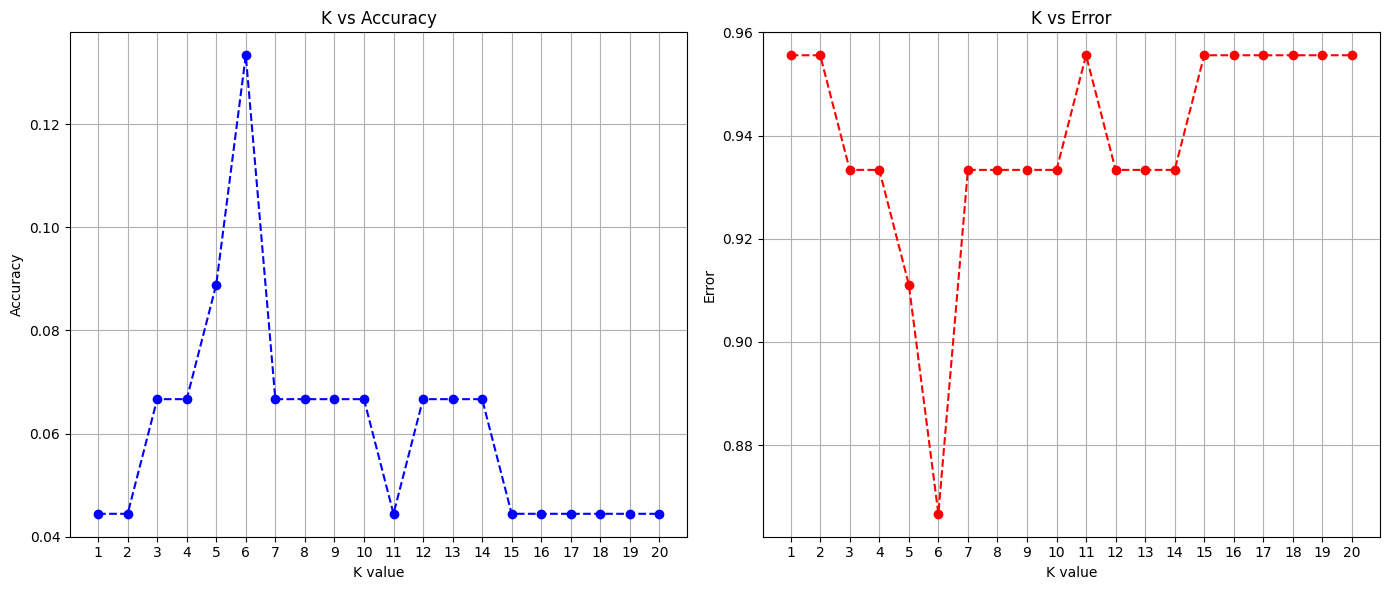


Optimal value of K is 6 with an accuracy of 13.33%


In [12]:
# Plotting K vs Accuracy and K vs Error
k_values_list = range(1, 21)
accuracy_list = []
error_list = []

for k in k_values_list:
    predicted_labels_k = knn_classifier(X_train, y_train, X_test, k)
    accuracy_k = calc_accuracy(y_test, predicted_labels_k)
    accuracy_list.append(accuracy_k)
    error_list.append(1 - accuracy_k)  # Error is 1 - Accuracy

# Plotting the K vs Accuracy and K vs Error curves
plt.figure(figsize=(14, 6))

# Subplot for the error
plt.subplot(1, 2, 2)
plt.plot(k_values_list, error_list, marker='o', linestyle='--', color='r')
plt.title('K vs Error')
plt.xlabel('K value')
plt.ylabel('Error')
plt.xticks(k_values_list)
plt.grid(True)

# Subplot for the accuracy
plt.subplot(1, 2, 1)
plt.plot(k_values_list, accuracy_list, marker='o', linestyle='--', color='b')
plt.title('K vs Accuracy')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.xticks(k_values_list)
plt.grid(True)

# Showing both the plots
plt.tight_layout()
plt.show()

# Finding the optimal value of K
optimal_k_value = k_values_list[np.argmax(accuracy_list)]
print(f"\nOptimal value of K is {optimal_k_value} with an accuracy of {max(accuracy_list) * 100:.2f}%")